# Preprocessing: Fast Fourier Transform

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def print_images(images, nrows=1, ncols=1, titles=None):
    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
        ax.set_title(label)
        
def fft_filter(image, low_freq, high_freq):
    # Get the pixel values
    pixels = np.array(image)

    # Perform the FFT
    fft = np.fft.fft2(pixels)

    # Shift the zero-frequency component to the center of the spectrum
    fft_shift = np.fft.fftshift(fft)

    # Get the shape of the FFT image
    rows, cols = fft_shift.shape

    # Create a mask for the low and high frequency regions
    mask = np.zeros((rows, cols), dtype=np.uint8)
    mask[int(rows*low_freq):int(rows*high_freq), int(cols*low_freq):int(cols*high_freq)] = 1

    # Apply the mask to the FFT image
    fft_filtered = fft_shift * mask

    # Perform the inverse FFT to get the filtered image
    filtered_image = np.fft.ifft2(np.fft.ifftshift(fft_filtered))

    # Convert to real values and normalize to [0, 255]
    filtered_image = np.abs(filtered_image)
    filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image)) * 255
    filtered_image = filtered_image.astype(np.uint8)

    return filtered_image

# Load the image: apples

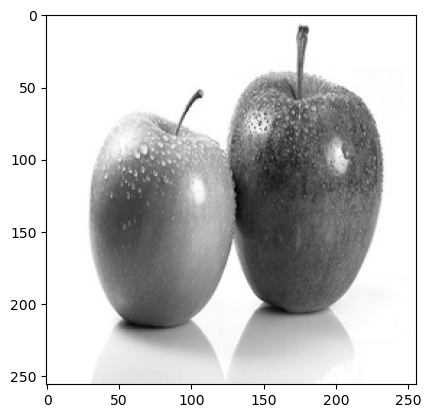

In [2]:
image = cv2.imread('apple.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

## Apply the transformation

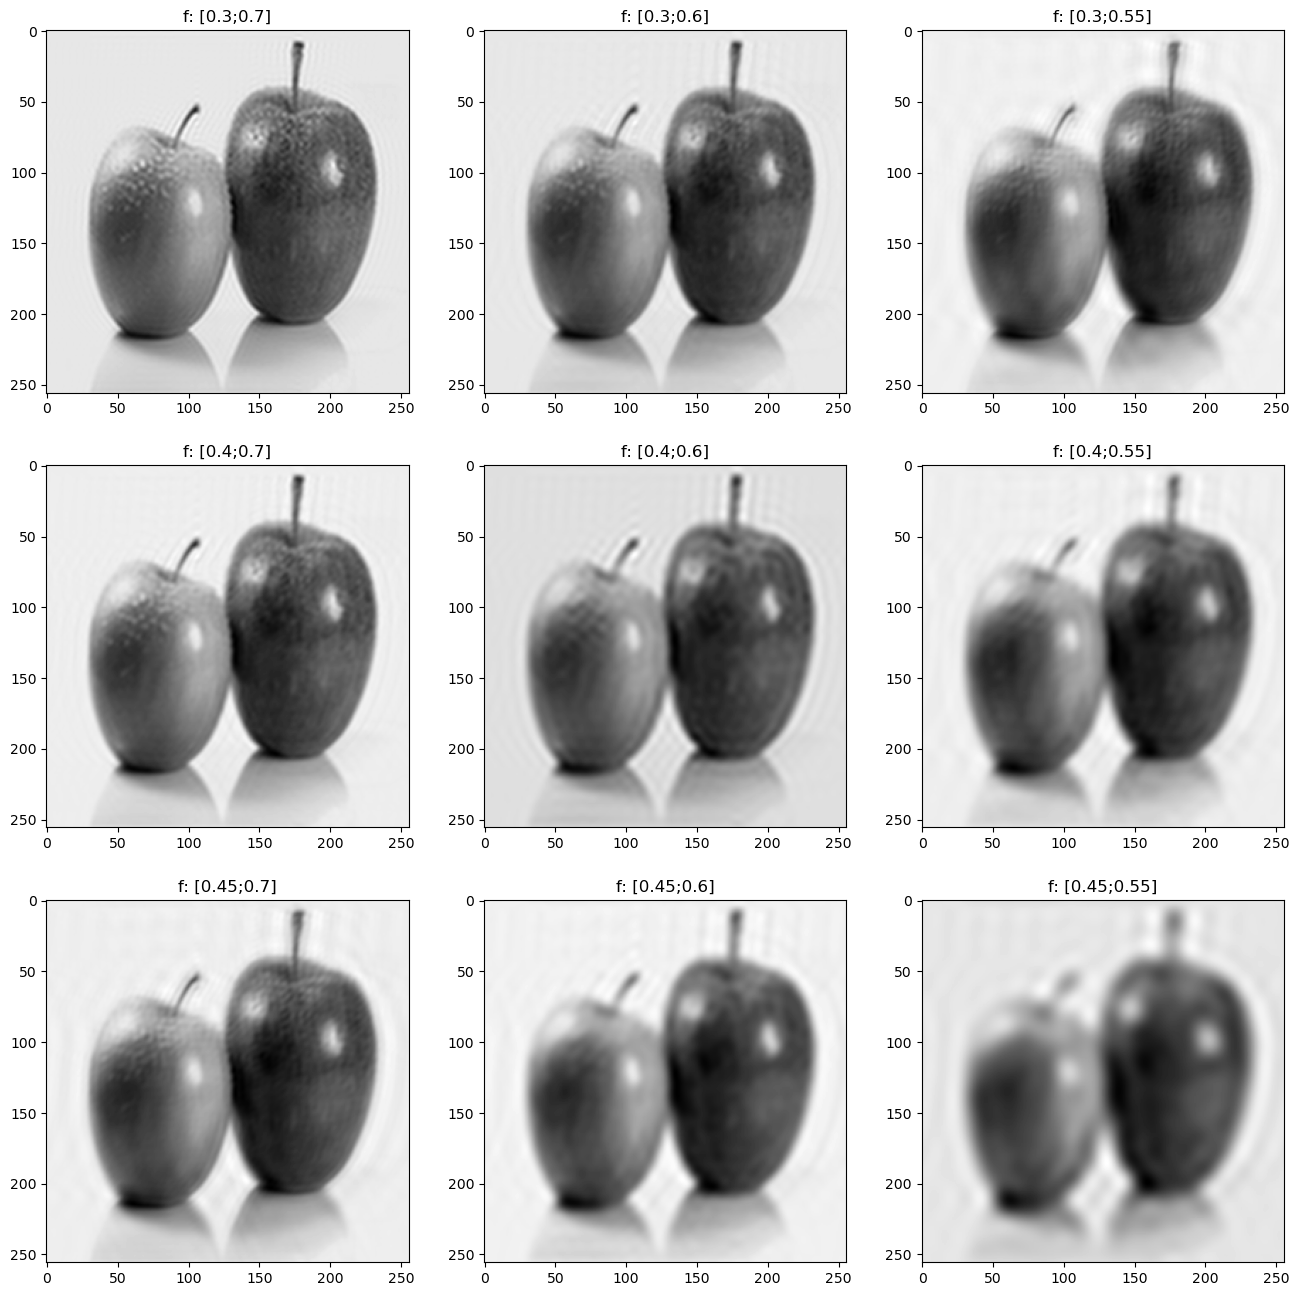

In [3]:
filtered_images = []
captions = []
low_frequencies = [0.3, 0.4, 0.45]
high_frequencies = [0.7, 0.6, 0.55]
for low_freq in low_frequencies:
    for high_freq in high_frequencies:
        filtered_images.append(fft_filter(gray_image,low_freq,high_freq))
        captions.append('f: [' + str(low_freq) + ';' + str(high_freq) + ']')

print_images(filtered_images, len(low_frequencies), len(high_frequencies), captions)

# Load the image: peppers

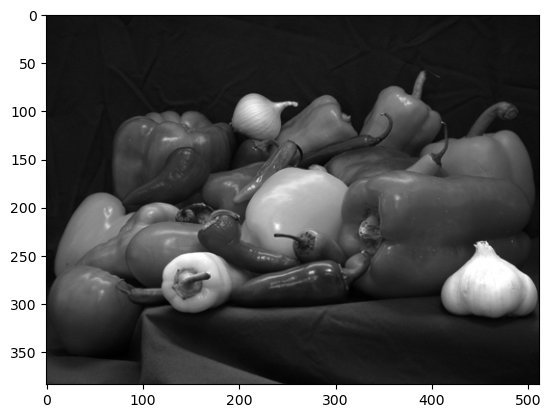

In [4]:
image = cv2.imread('peppers.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

## Apply the transformation

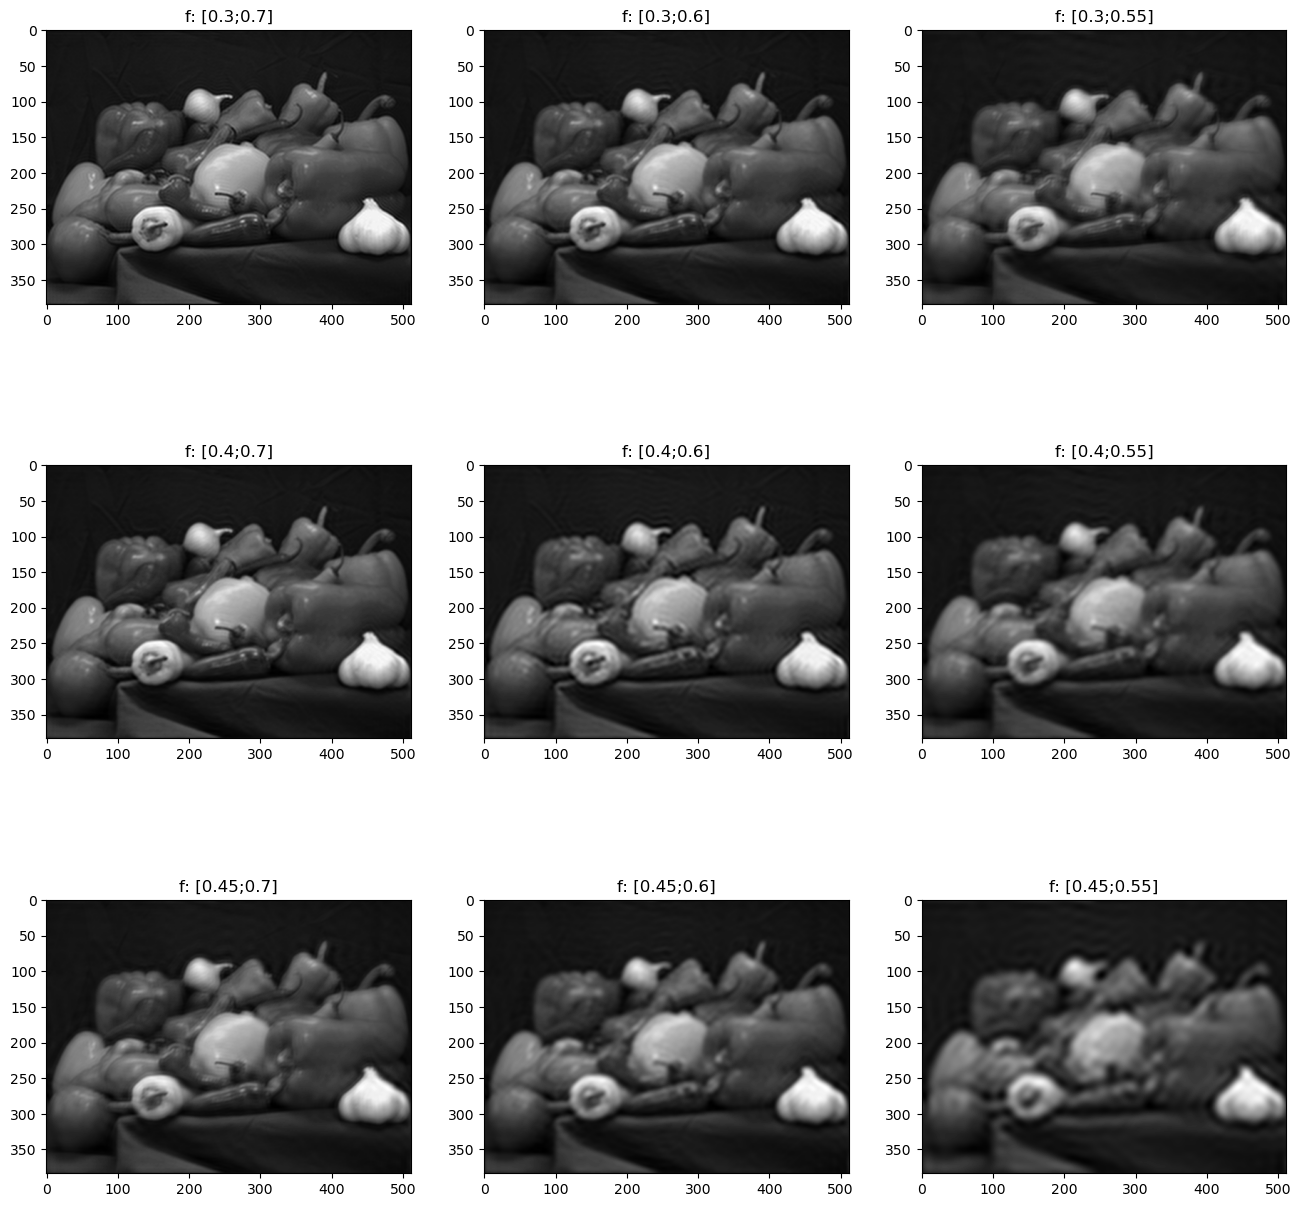

In [5]:
filtered_images = []
captions = []
low_frequencies = [0.3, 0.4, 0.45]
high_frequencies = [0.7, 0.6, 0.55]
for low_freq in low_frequencies:
    for high_freq in high_frequencies:
        filtered_images.append(fft_filter(gray_image,low_freq,high_freq))
        captions.append('f: [' + str(low_freq) + ';' + str(high_freq) + ']')

print_images(filtered_images, len(low_frequencies), len(high_frequencies), captions)